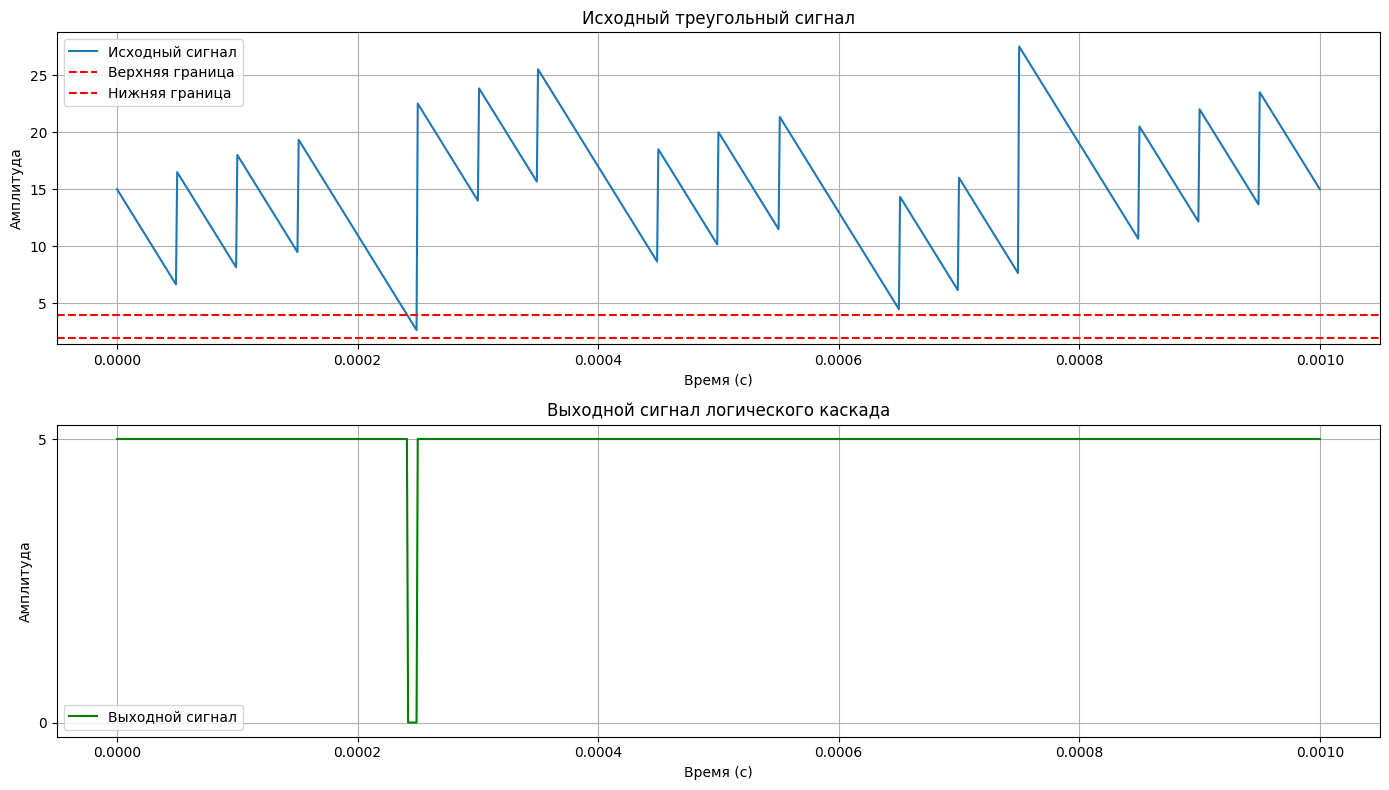

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигнала
duration = 1e-3  # длительность 1 мс
step = 1e-6      # шаг 1 мкс
amplitude = 5    # амплитуда
freqs = [10e3, 5e3, 2e3]  # частоты в Гц

# Создание массива времени
t = np.arange(0, duration, step)

# Генерация треугольных сигналов
signals = []
for freq in freqs:
    # Расчет периода
    period = 1 / freq
    # Генерация треугольного сигнала
    signal = amplitude * np.abs(2 * (t / period - np.floor(0.5 + t / period)) - 1)
    signals.append(signal)

# Объединение сигналов
total_signal = np.sum(signals, axis=0)

# Логический каскад
lower_bound = 2  # нижняя граница запрещенной зоны
upper_bound = 4  # верхняя граница запрещенной зоны
output_signal = np.zeros_like(total_signal)

# Обработка сигнала
for i in range(len(total_signal)):
    if total_signal[i] > upper_bound:
        output_signal[i] = 5
    elif total_signal[i] < lower_bound:
        output_signal[i] = 0

# Визуализация
plt.figure(figsize=(14, 8))

# График исходного сигнала
plt.subplot(2, 1, 1)
plt.plot(t, total_signal, label='Исходный сигнал')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница')
plt.title('Исходный треугольный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid()

# График выходного сигнала
plt.subplot(2, 1, 2)
plt.plot(t, output_signal, label='Выходной сигнал', color='green')
plt.title('Выходной сигнал логического каскада')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.yticks([0, 5])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()